### Урок 8. Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [2]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
import matplotlib.pyplot as plt


boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
# -- ВАШ КОД ТУТ --

In [14]:
def my_regressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    sgd_regressor = SGDRegressor(learning_rate='constant',fit_intercept=True,eta0=0.0001,random_state=42)
    w_current = np.random.random(X_train.shape[1])
    epsilon = 0.001
    weight_evolutino, r2score_evolution = [],[]
    for step in list(range(800)):
        sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
        weight_evolutino.append(distance.euclidean(w_current,sgd_regressor.coef_))
        if weight_evolutino[-1] < epsilon:
            print('Итерании остановлены на шаге %d' % step)
            break
        r2score_evolution.append(r2_score(y_test,sgd_regressor.predict(X_test)))
        w_current = sgd_regressor.coef_.copy()
    
    if weight_evolutino[-1] > epsilon:
        print('Алгоритм не сошелся на шаге %d weight_evolution %f ' % (step,weight_evolutino[-1]))
        step += 1
    
    plt.plot(range(step), r2score_evolution)
    print("r2-score %f" % r2_score(y_test, sgd_regressor.predict(X_test)))

        

Итерании остановлены на шаге 653
r2-score 0.623989


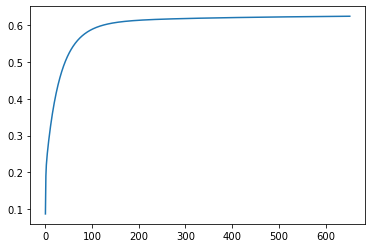

In [15]:
my_regressor(X,y)

0


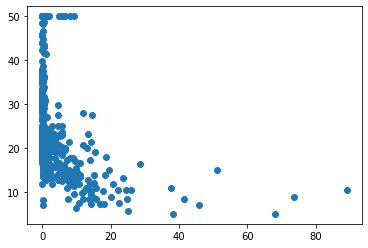

1


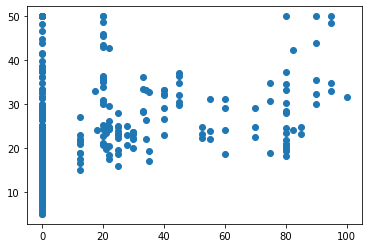

2


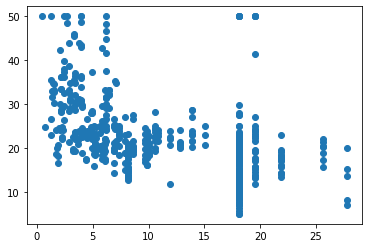

3


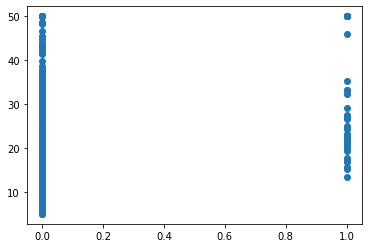

4


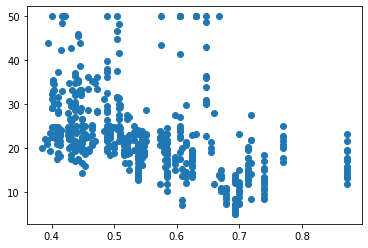

5


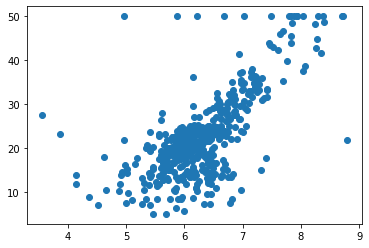

6


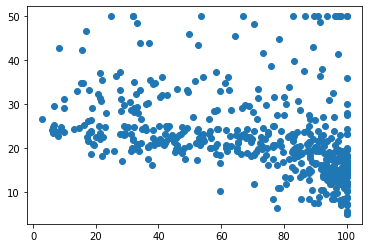

7


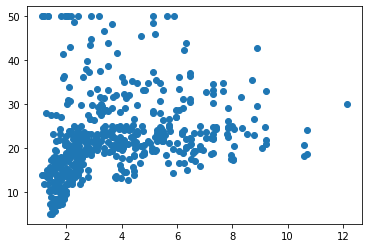

8


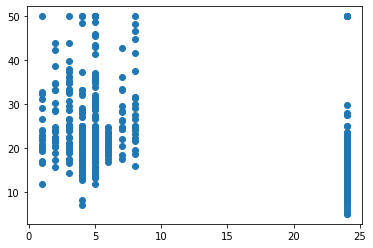

9


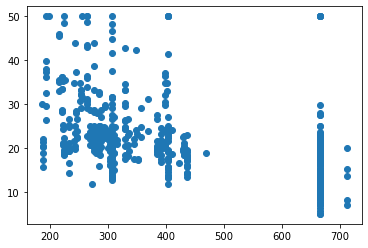

10


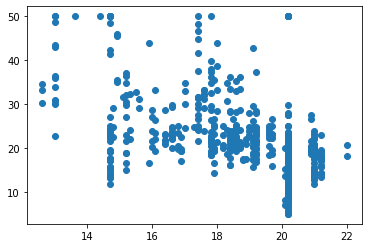

11


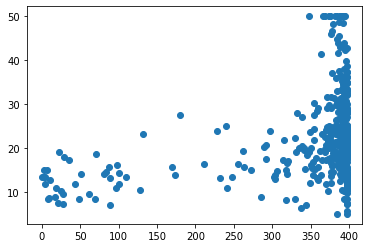

12


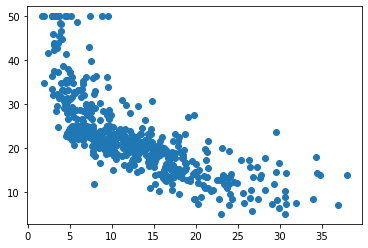

In [16]:
boston_dataset = load_boston()
X = boston_dataset.data
for i in range(0, X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()
X = np.delete(X,[ 9, 11],axis=1)

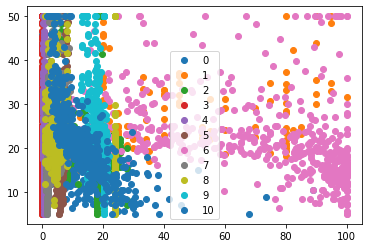

In [17]:
for i in range(0, X.shape[1]):
    plt.scatter(X[:,i], y)
plt.legend(range(0, X.shape[1]))
plt.show()

Итерании остановлены на шаге 653
r2-score 0.623989


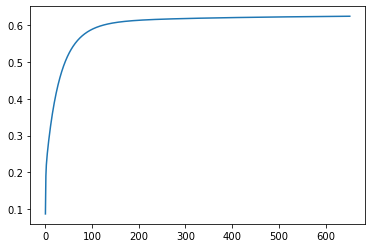

In [18]:
my_regressor(X, y)

Вы можете начать использовать градиентный спуск уже сейчас! Если вы хотите глубже понять механизмы, которые использует этот приём - добро пожаловать в урок 5, где мы поговорим о математике, которая стоит за градиентным спуском и даже реализуем градиентный спуск на языке Python.